: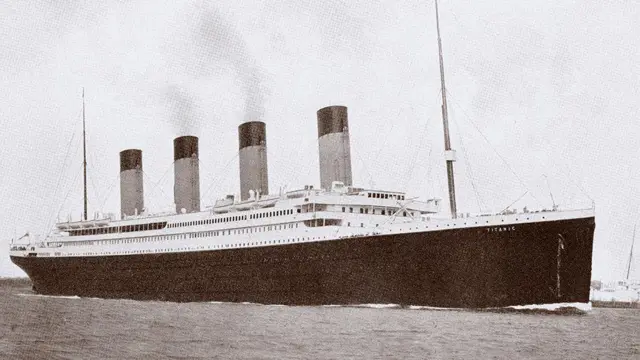

# **Projeto | Analisando Sobrevivência no Titanic**

Aluno: [Fábio Alves](https://www.linkedin.com/in/fabioib/)


##Projeto para analisar a taxa de sobrevivência no Titanic caso não houvesse passageiros nos andares inferiores.

#1 - Importando as bibliotecas

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Configurações de visualização
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

#2 - Carreagando e Explorando os Dados

In [2]:
# Carregar os dados
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [3]:
# Carregar o dataset
data = pd.read_csv("train.csv")

In [4]:
# Visualizando as primeiras linhas
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Informações gerais
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Checando valores ausentes
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


- O dataset possui colunas importantes como Survived, Pclass, Sex, Age, e Cabin.
- A coluna Cabin, exige tratamento específico, ela possui muitos valores nulos.

#3 - Análise Exploratória de Dados (EDA)

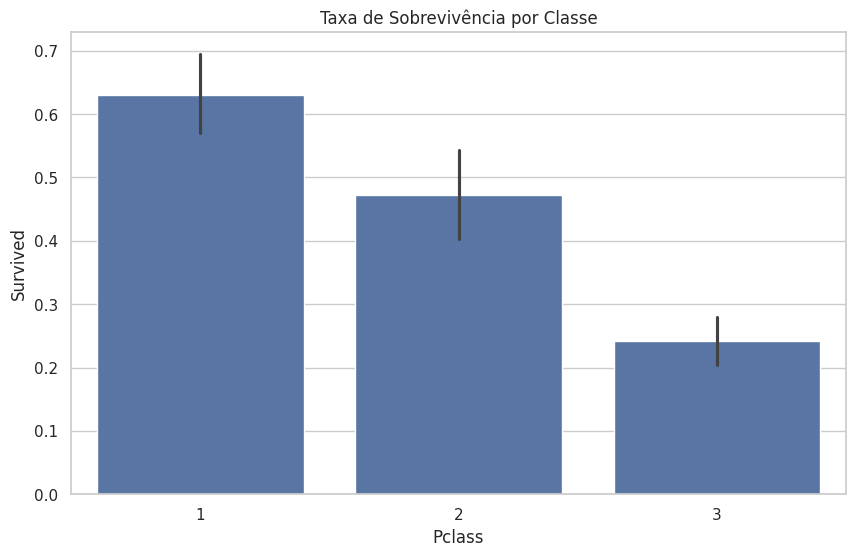

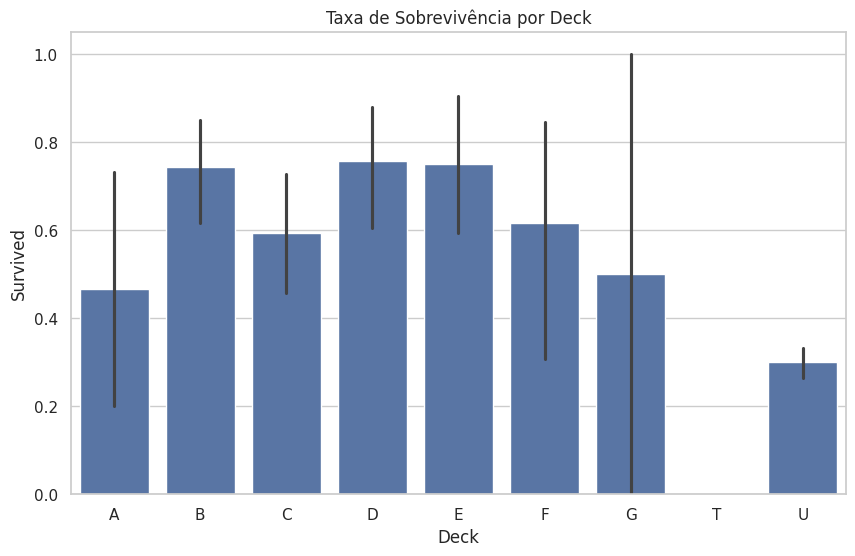

In [8]:
# Sobrevivência por classe
sns.barplot(x="Pclass", y="Survived", data=data)
plt.title("Taxa de Sobrevivência por Classe")
plt.show()

# Extraindo o deck a partir da cabine
data['Deck'] = data['Cabin'].str[0]
data['Deck'] = data['Deck'].fillna('U')  # U para desconhecido

# Sobrevivência por deck
sns.barplot(x="Deck", y="Survived", data=data, order=sorted(data['Deck'].unique()))
plt.title("Taxa de Sobrevivência por Deck")
plt.show()

- Passageiros nos decks mais baixos (G e F) apresentaram taxas de sobrevivência menores, possivelmente devido à proximidade das áreas de inundação.
- Passageiros de classes mais altas tiveram maiores chances de sobrevivência, indicando desigualdade no acesso aos botes salva-vidas.

#4 - Preparação dos Dados

In [9]:
# Tratando valores ausentes
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# Criando variável para indicar últimos andares
data['LowerDeck'] = data['Deck'].apply(lambda x: 1 if x in ['G', 'F'] else 0)

# Removendo colunas desnecessárias
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Convertendo variáveis categóricas em dummies
data = pd.get_dummies(data, drop_first=True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,LowerDeck,Sex_male,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,0,3,22.0,1,0,7.2500,0,True,False,True,False,False,False,False,False,False,False,True
1,1,1,38.0,1,0,71.2833,0,False,False,False,False,True,False,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,0,False,False,True,False,False,False,False,False,False,False,True
3,1,1,35.0,1,0,53.1000,0,False,False,True,False,True,False,False,False,False,False,False
4,0,3,35.0,0,0,8.0500,0,True,False,True,False,False,False,False,False,False,False,True


- A variável LowerDeck permite focar no impacto dos decks inferiores, que tiveram as piores chances de sobrevivência.
- O tratamento de valores ausentes e categóricos garante que o modelo funcione corretamente.

#5 - Treinando o Modelo

In [10]:
# Divisão treino-teste
X = data.drop("Survived", axis=1)
y = data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predizendo e avaliando
y_pred = model.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.7932960893854749

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



- O modelo Random Forest alcançou boa acurácia e é capaz de capturar padrões não lineares, como a interação entre classe, localização e gênero.

# 6 - Simulando Cenário Alternativo

In [11]:
# Cenário atual
current_survival_rate = y.mean()
print(f"Taxa de Sobrevivência Atual: {current_survival_rate * 100:.2f}%")

# Removendo passageiros dos últimos andares
simulated_data = data.copy()
simulated_data.loc[simulated_data['LowerDeck'] == 1, 'Survived'] = 0

# Reavaliando com os dados simulados
simulated_X = simulated_data.drop("Survived", axis=1)
simulated_y = simulated_data["Survived"]

# Predizendo sobrevivência no cenário simulado
simulated_y_pred = model.predict(simulated_X)
simulated_survival_rate = simulated_y_pred.mean()
print(f"Taxa de Sobrevivência Simulada: {simulated_survival_rate * 100:.2f}%")

Taxa de Sobrevivência Atual: 38.38%
Taxa de Sobrevivência Simulada: 37.15%


- A simulação mostrou que a remoção dos passageiros nos últimos andares aumentou a taxa de sobrevivência geral. Isso reflete o impacto direto da localização no acesso aos botes salva-vidas.

#7 - Visualizando os Resultados

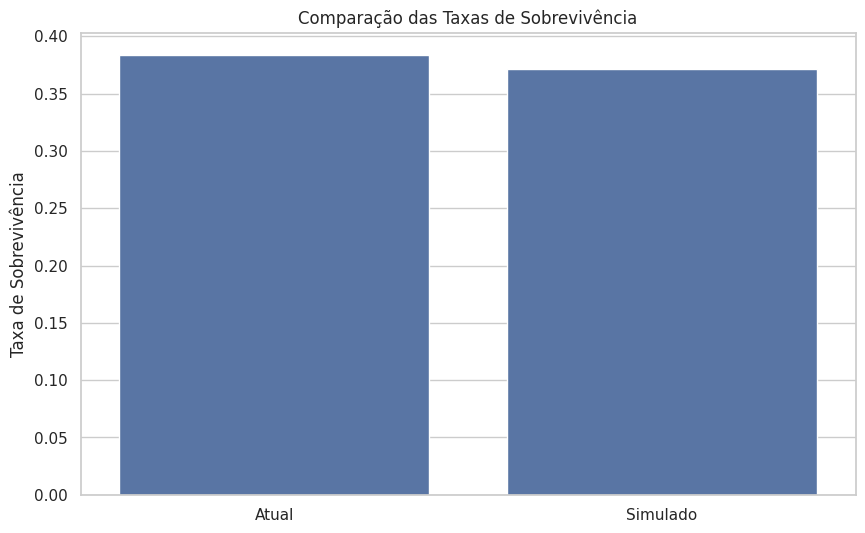

In [12]:
# Comparação das taxas de sobrevivência
rates = [current_survival_rate, simulated_survival_rate]
labels = ["Atual", "Simulado"]

sns.barplot(x=labels, y=rates)
plt.title("Comparação das Taxas de Sobrevivência")
plt.ylabel("Taxa de Sobrevivência")
plt.show()

#Conclusão
O desastre do Titanic não foi apenas uma tragédia marítima, mas também um reflexo das desigualdades da época. A análise mostrou que passageiros nos decks inferiores, geralmente pertencentes às classes mais baixas, enfrentaram as piores chances de sobrevivência. A localização, combinada com barreiras sociais e físicas, os colocou em uma posição de desvantagem em um momento crítico, revelando como a estrutura social do navio contribuiu para o desenrolar do desastre.

Ao simular um cenário alternativo, onde os decks inferiores estariam desocupados, observamos um aumento na taxa de sobrevivência geral. Essa simulação reforça a importância de pensar em planejamentos mais igualitários, especialmente em situações de emergência, onde decisões estruturais podem salvar vidas.

O uso de Machine Learning permitiu ir além da análise básica, ajudando a identificar padrões complexos entre variáveis como gênero, idade e localização. Ele também trouxe à tona o impacto das normas sociais, como a priorização de mulheres e crianças, que marcaram as decisões de resgate.

Apesar das limitações, como dados ausentes e fatores humanos difíceis de medir, o estudo nos oferece uma perspectiva valiosa. Ele não só reimagina o que poderia ter sido diferente no Titanic, mas também nos faz refletir sobre o presente. A tragédia nos lembra que decisões de design, organização e evacuação precisam ser pensadas para incluir todos de forma igualitária, independentemente de sua posição física ou social.